In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("./data/TrainVal.csv")
data.sample(10)

,tweet,label,tweet_cleaned,tweet_len
4033,@MarshaBlackburn 2)If genetic manipulation had...,fake,2 genet manipul perform one sever reverse-gene...,38
7423,16 COVID-19 cases reported in Ernakulam hours ...,fake,16 covid 19 case report ernakulam hour declar ...,16
2767,Chinese eating octopus after surviving coronav...,fake,chines eat octopu surviv coronaviru,6
3021,The Washington Post has published an editorial...,fake,washington post publish editori whose titl eit...,17
7097,Study Shows Most Americans Prefer Indefinite I...,fake,studi show american prefer indefinit isol give...,16
1388,Indian Prime Minister Narendra Modi has been s...,fake,indian prime minist narendra modi select leade...,16
7225,"@XiJimping Sir, why you are stonewalling again...",fake,sir stonewal india perman veto member unsc spr...,41
7583,In Kenya the National Council For Persons With...,fake,kenya nation council person disabl,9
5062,The first night of the first-ever virtual DNC ...,fake,first night first-ev virtual dnc differ gov cu...,41
1272,Our daily update is published. We’ve tracked a...,real,daili updat publish track total 831351 test 95...,43


In [3]:
def print_tweets_per_label(df, n=5):
    real = df[df.label == "real"]["tweet_cleaned"].sample(n)
    display(Markdown("### Real Tweets"))
    real.apply(print)
    
    fake = df[df.label == "fake"]["tweet_cleaned"].sample(n)
    display(Markdown("### Fake Tweets"))
    fake.apply(print)

In [4]:
print_tweets_per_label(data, n=5)

### Real Tweets

big promis industri come receiv part note
steep rise covid 19 recoveri indic india' collabor grade evolv respons strategi born result
cdc network track covid 19 hospit rate show overal hospit rate increas w rate increas w age rate ppl 65 highest 39 per 1000 peopl ppl 65 take special precaut prevent covid 19
eight southern state outsid texa florida current 1000 patient hospit covid 19
ok new site


### Fake Tweets

drink cold water hot drink alcohol protect coronaviru
american scientist judi mykowitz expos fact us administr regard coronaviru accus us militari fabric conjunct wuhan chines laboratori
human be endang speci list
photo show pack beach re-open jacksonvil beach cnn
video show muslim women spit plastic bag throw hous spread coronaviru


In [5]:
print_tweets_per_label(data, n=5)

### Real Tweets

indiafightscorona activ case 22 total covid 19 case recoveri 26 lakh exceed activ case 18 lakh
laborday plan pool beach stay 6 feet away other wearamask water wash hand often help protect friend covid 19 learn
death also lowest level sinc last monday there' probabl someth weekend hangov effect today' test death data look april 5-6 number also depress pop back state clear report backlog
hcp learn covid 19 associ vte risk consider upcom webinar mark calendar septemb 17 2 p et pre-regist
covid vaccin target us move back mid 2021 requir full fda approv process


### Fake Tweets

bill gate fund vaccin adhes patch form vaccin contain microchip go use monitor peopl via 5g network
microsoft c lewi common they'v subject covid 19 misinform here' fact checker say coronacheck
claim india began screen travel covid 19 affect nation singl case pm modi fact 20 countri case januari 30 india report first case yet india screen travel china hong kong
american find cornoaviru best ward lie couch watch lot v
corona vaccin russia becom first countri complet clinic trial covid 19 vaccin sechenov univers said conclud studi


In [6]:
print_tweets_per_label(data, n=5)

### Real Tweets

bolton see anoth sharp rise coronaviru infect 192 new case per 1000 peopl
break bori johnson set announc pub bar restaur throughout england forc close 10pm thursday sky' chief polit correspond latest westminst get stori
hollywood actor paul rudd encourag young peopl wear face mask entertain video us grappl covid 19 pandem
acc guidelin 1-2 covid 19 case report need close entir offic build halt work area offic work resum disinfect per laid protocol 1/4
northern ireland first minist arlen foster say new restrict tough countri known hospit say kind host attend larg gather moment said ad winner would covid 19


### Fake Tweets

nanci pelosi said congress shall vote remot secur also say american vote presid mail ”
trump order penc shutdown gather corona beer destroy
mike pompeo launch fresh attack coronaviru
kroger corpor say employe wear flag mask wear blm mask �
chines govern releas new nation flag


In [3]:
print("Shape before removing duplicate", data.shape)
data.dropna(inplace=True)
data.drop_duplicates(subset=["tweet_cleaned"], inplace=True)
print("Shape after removing duplicate", data.shape)

Shape before removing duplicate (8560, 4)
Shape after removing duplicate (8413, 4)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['tweet_cleaned'], data["label"], test_size=0.2, random_state=41)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [6]:
import metrics as mmetrics
from sklearn import metrics

In [12]:
result_1 = pd.DataFrame()

In [13]:
model = make_pipeline(
    CountVectorizer(max_features=1000, analyzer='word'), # ngram_range=(1,3), 
    LogisticRegression(random_state=41)
)

In [14]:
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1:]

y = y_test.values.reshape((-1, 1))
y = y =="real"
perfs = mmetrics.get_performance_metrics(y, probs, class_labels=["lr_ng_1_mdf_1"])
result_1 = pd.concat([result_1, perfs])
result_1

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
lr_ng_1_mdf_1,766,739,77,101,0.894,0.515,0.884,0.906,0.909,0.88,0.961,0.896,0.5


In [23]:
def train_pipeline_count_classifier(classifier, ngram_range=(1, 1), name="lr_ng_1_mdf_1", max_df=1):
    model = make_pipeline(
        CountVectorizer(max_features=1000, analyzer='word', ngram_range=ngram_range, max_df=max_df), # ngram_range=(1,3), 
        classifier
    )

    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1:]

    y = y_test.values.reshape((-1, 1))
    y = y =="real"
    perfs = mmetrics.get_performance_metrics(y, probs, class_labels=[name])
    return perfs

In [16]:
result_1 = pd.DataFrame()

perfs = train_pipeline_count_classifier(LogisticRegression(random_state=41), ngram_range=(1, 1), name="lr_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(MultinomialNB(), ngram_range=(1, 1), name="mnb_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(
    XGBClassifier(random_state=41, objective='binary:logistic', eval_metric="logloss"), ngram_range=(1, 1), name="xgb_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(SVC(random_state=41, probability=True), ngram_range=(1, 1), name="svc_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(BaggingClassifier(random_state=41), ngram_range=(1, 1), name="bgc_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(RandomForestClassifier(random_state=41), ngram_range=(1, 1), name="rfc_ng_1_mdf_1")
result_1 = pd.concat([result_1, perfs])

In [17]:
display(Markdown("## Val Score n_gram (1, 1) and max_df 1"))
display(result_1)

## Val Score n_gram (1, 1) and max_df 1

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
lr_ng_1_mdf_1,766,739,77,101,0.894,0.515,0.884,0.906,0.909,0.88,0.961,0.896,0.5
mnb_ng_1_mdf_1,713,728,88,154,0.856,0.515,0.822,0.892,0.89,0.825,0.938,0.855,0.5
xgb_ng_1_mdf_1,755,743,73,112,0.89,0.515,0.871,0.911,0.912,0.869,0.959,0.891,0.5
svc_ng_1_mdf_1,776,714,102,91,0.885,0.515,0.895,0.875,0.884,0.887,0.959,0.889,0.5
bgc_ng_1_mdf_1,738,693,123,129,0.85,0.515,0.851,0.849,0.857,0.843,0.919,0.854,0.5
rfc_ng_1_mdf_1,759,719,97,108,0.878,0.515,0.875,0.881,0.887,0.869,0.951,0.881,0.5


In [18]:
result_1.to_csv("./output/n_gram_1_max_df_1.csv", index=True)

## N_Gram_Range (1, 2)

In [24]:
result_1 = pd.DataFrame()

perfs = train_pipeline_count_classifier(LogisticRegression(random_state=41), ngram_range=(1, 2), name="lr_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(MultinomialNB(), ngram_range=(1, 2), name="mnb_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(
    XGBClassifier(random_state=41, objective='binary:logistic', eval_metric="logloss"), ngram_range=(1, 2), name="xgb_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(SVC(random_state=41, probability=True), ngram_range=(1, 2), name="svc_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(BaggingClassifier(random_state=41), ngram_range=(1, 2), name="bgc_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(RandomForestClassifier(random_state=41), ngram_range=(1, 2), name="rfc_ng_2_mdf_1")
result_1 = pd.concat([result_1, perfs])

In [20]:
display(Markdown("## Val Score n_gram (1, 2) and max_df 1"))
display(result_1)

## Val Score n_gram (1, 2) and max_df 1

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
lr_ng_2_mdf_1,767,745,71,100,0.898,0.515,0.885,0.913,0.915,0.882,0.96,0.9,0.5
mnb_ng_2_mdf_1,689,747,69,178,0.853,0.515,0.795,0.915,0.909,0.808,0.929,0.848,0.5
xgb_ng_2_mdf_1,749,735,81,118,0.882,0.515,0.864,0.901,0.902,0.862,0.957,0.883,0.5
svc_ng_2_mdf_1,768,718,98,99,0.883,0.515,0.886,0.88,0.887,0.879,0.956,0.886,0.5
bgc_ng_2_mdf_1,728,689,127,139,0.842,0.515,0.84,0.844,0.851,0.832,0.918,0.846,0.5
rfc_ng_2_mdf_1,765,721,95,102,0.883,0.515,0.882,0.884,0.89,0.876,0.95,0.886,0.5


In [25]:
result_1.to_csv("./output/n_gram_2_max_df_1.csv", index=True)

## N_Gram_Range (1, 3)

In [21]:
result_1 = pd.DataFrame()

perfs = train_pipeline_count_classifier(LogisticRegression(random_state=41), ngram_range=(1, 3), name="lr_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(MultinomialNB(), ngram_range=(1, 3), name="mnb_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(
    XGBClassifier(random_state=41, objective='binary:logistic', eval_metric="logloss"), ngram_range=(1, 3), name="xgb_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(SVC(random_state=41, probability=True), ngram_range=(1, 3), name="svc_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(BaggingClassifier(random_state=41), ngram_range=(1, 3), name="bgc_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(RandomForestClassifier(random_state=41), ngram_range=(1, 3), name="rfc_ng_3_mdf_1")
result_1 = pd.concat([result_1, perfs])

In [22]:
display(Markdown("## Val Score n_gram (1, 3) and max_df 1"))
display(result_1)

## Val Score n_gram (1, 3) and max_df 1

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
lr_ng_3_mdf_1,762,742,74,105,0.894,0.515,0.879,0.909,0.911,0.876,0.96,0.895,0.5
mnb_ng_3_mdf_1,674,752,64,193,0.847,0.515,0.777,0.922,0.913,0.796,0.926,0.84,0.5
xgb_ng_3_mdf_1,742,742,74,125,0.882,0.515,0.856,0.909,0.909,0.856,0.958,0.882,0.5
svc_ng_3_mdf_1,769,717,99,98,0.883,0.515,0.887,0.879,0.886,0.88,0.956,0.886,0.5
bgc_ng_3_mdf_1,722,690,126,145,0.839,0.515,0.833,0.846,0.851,0.826,0.916,0.842,0.5
rfc_ng_3_mdf_1,761,720,96,106,0.88,0.515,0.878,0.882,0.888,0.872,0.95,0.883,0.5


In [23]:
result_1.to_csv("./output/n_gram_3_max_df_1.csv", index=True)

## N_Gram_Range (1, 3) max_df 0.15

In [27]:
result_1 = pd.DataFrame()

perfs = train_pipeline_count_classifier(LogisticRegression(random_state=41), ngram_range=(1, 3), name="lr_ng_3_mdf_0_15", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(MultinomialNB(), ngram_range=(1, 3), name="mnb_ng_3_mdf_1", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(
    XGBClassifier(random_state=41, objective='binary:logistic', eval_metric="logloss"), ngram_range=(1, 3), name="xgb_ng_3_mdf_0_15", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(SVC(random_state=41, probability=True), ngram_range=(1, 3), name="svc_ng_3_mdf_0_15", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(BaggingClassifier(random_state=41), ngram_range=(1, 3), name="bgc_ng_3_mdf_0_15", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

perfs = train_pipeline_count_classifier(RandomForestClassifier(random_state=41), ngram_range=(1, 3), name="rfc_ng_3_mdf_0_15", max_df=0.15)
result_1 = pd.concat([result_1, perfs])

In [28]:
display(Markdown("## Val Score n_gram (1, 3) and max_df 0.15"))
display(result_1)

## Val Score n_gram (1, 3) and max_df 0.15

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
lr_ng_3_mdf_0_15,757,750,66,110,0.895,0.515,0.873,0.919,0.92,0.872,0.958,0.896,0.5
mnb_ng_3_mdf_1,682,739,77,185,0.844,0.515,0.787,0.906,0.899,0.8,0.922,0.839,0.5
xgb_ng_3_mdf_0_15,741,740,76,126,0.88,0.515,0.855,0.907,0.907,0.855,0.955,0.88,0.5
svc_ng_3_mdf_0_15,769,718,98,98,0.884,0.515,0.887,0.88,0.887,0.88,0.954,0.887,0.5
bgc_ng_3_mdf_0_15,739,687,129,128,0.847,0.515,0.852,0.842,0.851,0.843,0.917,0.852,0.5
rfc_ng_3_mdf_0_15,755,718,98,112,0.875,0.515,0.871,0.88,0.885,0.865,0.948,0.878,0.5


In [29]:
result_1.to_csv("./output/n_gram_3_max_df_0_15.csv", index=True)

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [8]:
import optuna
from optuna import Trial

In [9]:
data.index = list(range(len(data.index)))
data.index.name = 'ID'
data.sample(10)

,tweet,label,tweet_cleaned,tweet_len
ID,,,,
7717,COVID-19 Update There are no new cases of COVI...,real,covid 19 updat new case covid 19 report new ze...,33
652,New @CDCMMWR finds odds of #COVID19 outbreaks ...,real,new find odd covid 19 outbreak west virginia n...,45
5126,Currently there are 75 #ContainmentZones in #S...,real,current 75 containmentzon southdelhi district,22
3324,Our reopening metrics provide important benchm...,real,reopen metric provid import benchmark consid r...,35
5133,COVID helped urologists embrace telemedicine. ...,real,covid help urologist embrac telemedicin,6
3597,RT @drharshvardhan: #CoronaVirusUpdates 79% of...,real,coronavirusupd 79 new recov case report 10 sta...,18
6821,Ten new cases of #COVID19 have been reported i...,real,ten new case covid 19 report nigeria 6 lago 2 ...,44
4999,#IndiaFightsCorona India's #COVID19 recoveries...,real,indiafightscorona india' covid 19 recoveri cro...,21
135,_Photo of a vaccine developed by U.S. scientis...,fake,_photo vaccin develop u scientist covid 19,10


In [18]:
def train_model_xgb(trial:Trial):
    n_folds=5
    X, y = data['tweet_cleaned'].copy(), (data["label"] == "real").copy()
    
    count_params = {
        'ngram_range': (1, trial.suggest_int("ngram_range", 1, 4)),
        'max_df': trial.suggest_float("max_df", 0.15, 1.0, log=True),
        "max_features": trial.suggest_int("max_features", 100, 2000),
        "min_df": 0.,
        "analyzer": 'word'
    }
    
    xgb_params= {
        "objective": "binary:logistic",
        "n_estimators": trial.suggest_int("n_estimators", 32, 750),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "n_jobs": 7,
        "seed": 1000,
        "verbosity":0,
        # 'tree_method': "gpu_hist",
        # "gpu_id": 0,
        "subsample": trial.suggest_float("subsample", 0.7, 0.9, log=True),#0.7
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.9, log=True),
        "lambda":trial.suggest_float("lambda", 1, 10, log=True),
        "alpha": trial.suggest_float("alpha", 1, 10, log=True),
        "eval_metric":'logloss'
    }
    
    score = 0
    for train_index, test_index in StratifiedKFold(n_splits=n_folds, random_state=1000, shuffle=True).split(X, y):
        cv = CountVectorizer(**count_params)
        xgb = XGBClassifier(**xgb_params)
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        X_train = cv.fit_transform(X_train)
        X_test = cv.transform(X_test)
        
        # xgbclassifier__
        params = dict(
            eval_set=[(X_train, y_train)], early_stopping_rounds=30, verbose=False
        )
        
        xgb.fit(X_train, y_train, **params)
        probs = xgb.predict_proba(X_test)[:, 1]
        
        score += metrics.roc_auc_score(y_test, probs)
    return score/n_folds

In [19]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(), direction="maximize")

study.optimize(train_model_xgb, n_trials=100)

[I 2022-01-31 00:08:01,812] A new study created in memory with name: no-name-8076129c-8f58-403e-ae5c-c85c354bae46
[I 2022-01-31 00:08:10,033] Trial 0 finished with value: 0.9544990242548149 and parameters: {'ngram_range': 3, 'max_df': 0.15700625702489693, 'max_features': 1918, 'n_estimators': 605, 'max_depth': 6, 'subsample': 0.7045065242938694, 'colsample_bytree': 0.8651971412419208, 'learning_rate': 0.09841822551635786, 'lambda': 4.698294438183772, 'alpha': 1.4655760967432274}. Best is trial 0 with value: 0.9544990242548149.
[I 2022-01-31 00:08:16,530] Trial 1 finished with value: 0.9547380205041393 and parameters: {'ngram_range': 3, 'max_df': 0.45788131905352053, 'max_features': 764, 'n_estimators': 613, 'max_depth': 5, 'subsample': 0.873605896791668, 'colsample_bytree': 0.8281280245198372, 'learning_rate': 0.3772840130114784, 'lambda': 5.657376362144499, 'alpha': 5.96420409966943}. Best is trial 1 with value: 0.9547380205041393.
[I 2022-01-31 00:08:23,595] Trial 2 finished with val

In [20]:
study.best_params

{'ngram_range': 2,
 'max_df': 0.4695685026281612,
 'max_features': 1525,
 'n_estimators': 692,
 'max_depth': 10,
 'subsample': 0.8986834115762586,
 'colsample_bytree': 0.8016705977397218,
 'learning_rate': 0.11218326200999994,
 'lambda': 1.4780846339945577,
 'alpha': 1.0006743817793966}

In [21]:
study.best_value

0.9659055658448683

In [22]:
for trial in study.get_trials():
    if trial.value > 0.965:
        print(trial.params)

{'ngram_range': 2, 'max_df': 0.6648896815644944, 'max_features': 1928, 'n_estimators': 605, 'max_depth': 10, 'subsample': 0.7159105584464553, 'colsample_bytree': 0.7851446292315494, 'learning_rate': 0.13139478930452317, 'lambda': 1.2081963210286712, 'alpha': 1.0087203749646416}
{'ngram_range': 2, 'max_df': 0.5734386815505002, 'max_features': 1852, 'n_estimators': 619, 'max_depth': 10, 'subsample': 0.7429910976859045, 'colsample_bytree': 0.7888083765678766, 'learning_rate': 0.09476035838815582, 'lambda': 1.5069071048867133, 'alpha': 1.0635410462906472}
{'ngram_range': 2, 'max_df': 0.5598510907800135, 'max_features': 1860, 'n_estimators': 668, 'max_depth': 10, 'subsample': 0.740505680619628, 'colsample_bytree': 0.7890597595825234, 'learning_rate': 0.09267878471753657, 'lambda': 1.5471785941483178, 'alpha': 1.0002669363684187}
{'ngram_range': 2, 'max_df': 0.572435522601649, 'max_features': 1825, 'n_estimators': 676, 'max_depth': 10, 'subsample': 0.7441242568741051, 'colsample_bytree': 0.7

In [24]:
def get_xgbclassifier(params):
    xgb_params= {
        "objective": "binary:logistic",
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "n_jobs": 7,
        "seed": 1000,
        "verbosity":0,
        # 'tree_method': "gpu_hist",
        # "gpu_id": 0,
        "subsample": params["subsample"],#0.7
        "colsample_bytree": params["colsample_bytree"],
        "learning_rate": params["learning_rate"],
        "lambda": params["lambda"],
        "alpha": params["alpha"],
        "eval_metric":'logloss'
    }
    xgb_model = XGBClassifier(**xgb_params)
    return xgb_model

def get_countvectorizer(params):
    count_params = {
        'ngram_range': (1, params["ngram_range"]),
        'max_df': params["max_df"],
        "max_features": params["max_features"],
        "min_df": 0.,
        "analyzer": 'word'
    }
    cv = CountVectorizer(**count_params)
    return cv

def train_pipeline_count_classifier(classifier, cvect, name="lr_ng_1_mdf_1"):
    model = make_pipeline(
        cvect, 
        classifier
    )

    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1:]

    y = y_test.values.reshape((-1, 1))
    y = y =="real"
    perfs = mmetrics.get_performance_metrics(y, probs, class_labels=[name])
    return perfs

In [25]:
trial.number

99

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['tweet_cleaned'], data["label"], test_size=0.2, random_state=41)

In [29]:
result = pd.DataFrame()

for trial in study.get_trials():
    if trial.value > 0.965:
        params = trial.params
        perfs = train_pipeline_count_classifier(
            get_xgbclassifier(params),
            get_countvectorizer(params),
            name="xgb_"+str(trial.number)
        )
        result = pd.concat([result, perfs])

In [30]:
result

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
xgb_55,765,742,74,102,0.895,0.515,0.882,0.909,0.912,0.879,0.964,0.897,0.5
xgb_62,760,739,77,107,0.891,0.515,0.877,0.906,0.908,0.874,0.963,0.892,0.5
xgb_63,766,738,78,101,0.894,0.515,0.884,0.904,0.908,0.88,0.963,0.895,0.5
xgb_64,763,737,79,104,0.891,0.515,0.88,0.903,0.906,0.876,0.963,0.893,0.5
xgb_66,767,742,74,100,0.897,0.515,0.885,0.909,0.912,0.881,0.963,0.898,0.5
xgb_77,762,738,78,105,0.891,0.515,0.879,0.904,0.907,0.875,0.964,0.893,0.5
xgb_91,760,738,78,107,0.89,0.515,0.877,0.904,0.907,0.873,0.963,0.891,0.5
xgb_95,769,739,77,98,0.896,0.515,0.887,0.906,0.909,0.883,0.964,0.898,0.5


In [31]:
for trial in study.get_trials():
    if trial.value > 0.965:
        params = trial.params
        perfs = train_pipeline_count_classifier(
            LogisticRegression(random_state=1000),
            get_countvectorizer(params),
            name="lr_"+str(trial.number)
        )
        result = pd.concat([result, perfs])

In [32]:
result

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
xgb_55,765,742,74,102,0.895,0.515,0.882,0.909,0.912,0.879,0.964,0.897,0.5
xgb_62,760,739,77,107,0.891,0.515,0.877,0.906,0.908,0.874,0.963,0.892,0.5
xgb_63,766,738,78,101,0.894,0.515,0.884,0.904,0.908,0.88,0.963,0.895,0.5
xgb_64,763,737,79,104,0.891,0.515,0.88,0.903,0.906,0.876,0.963,0.893,0.5
xgb_66,767,742,74,100,0.897,0.515,0.885,0.909,0.912,0.881,0.963,0.898,0.5
xgb_77,762,738,78,105,0.891,0.515,0.879,0.904,0.907,0.875,0.964,0.893,0.5
xgb_91,760,738,78,107,0.89,0.515,0.877,0.904,0.907,0.873,0.963,0.891,0.5
xgb_95,769,739,77,98,0.896,0.515,0.887,0.906,0.909,0.883,0.964,0.898,0.5
lr_55,773,742,74,94,0.9,0.515,0.892,0.909,0.913,0.888,0.968,0.902,0.5


In [33]:
for trial in study.get_trials():
    if trial.value > 0.965:
        params = trial.params
        perfs = train_pipeline_count_classifier(
            SVC(random_state=1000, probability=True),
            get_countvectorizer(params),
            name="svc_"+str(trial.number)
        )
        result = pd.concat([result, perfs])

In [34]:
result

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
xgb_55,765,742,74,102,0.895,0.515,0.882,0.909,0.912,0.879,0.964,0.897,0.5
xgb_62,760,739,77,107,0.891,0.515,0.877,0.906,0.908,0.874,0.963,0.892,0.5
xgb_63,766,738,78,101,0.894,0.515,0.884,0.904,0.908,0.88,0.963,0.895,0.5
xgb_64,763,737,79,104,0.891,0.515,0.88,0.903,0.906,0.876,0.963,0.893,0.5
xgb_66,767,742,74,100,0.897,0.515,0.885,0.909,0.912,0.881,0.963,0.898,0.5
xgb_77,762,738,78,105,0.891,0.515,0.879,0.904,0.907,0.875,0.964,0.893,0.5
xgb_91,760,738,78,107,0.89,0.515,0.877,0.904,0.907,0.873,0.963,0.891,0.5
xgb_95,769,739,77,98,0.896,0.515,0.887,0.906,0.909,0.883,0.964,0.898,0.5
lr_55,773,742,74,94,0.9,0.515,0.892,0.909,0.913,0.888,0.968,0.902,0.5


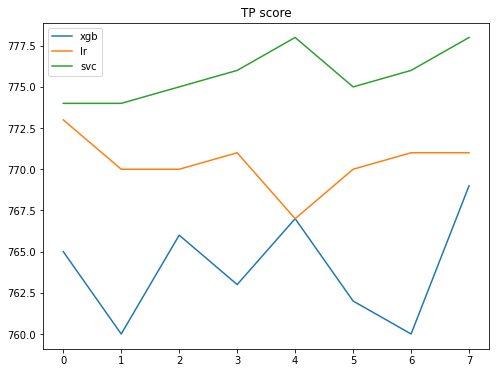

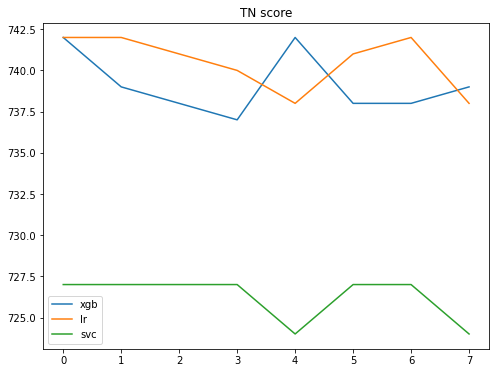

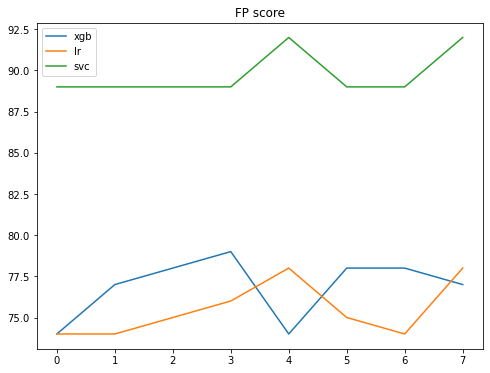

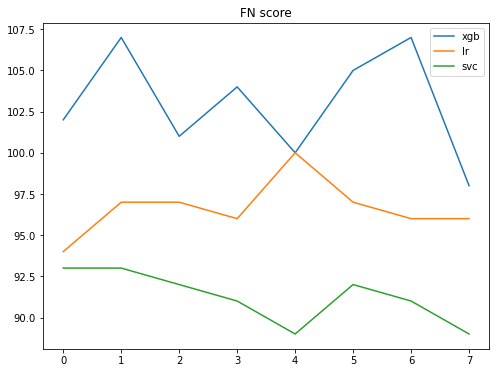

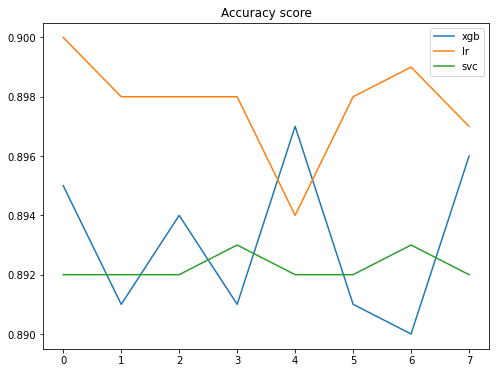

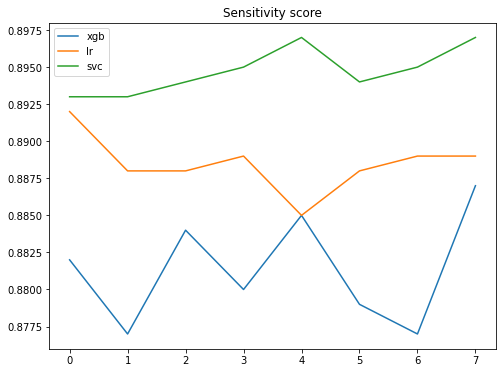

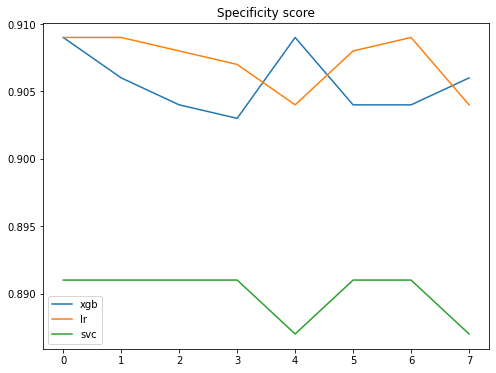

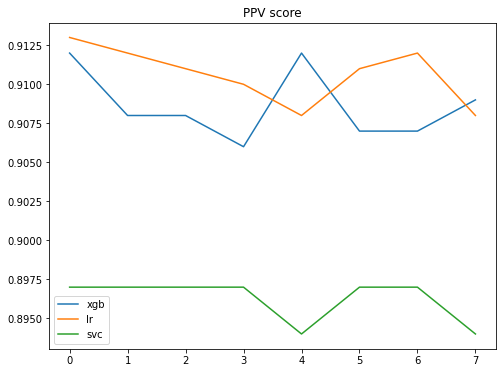

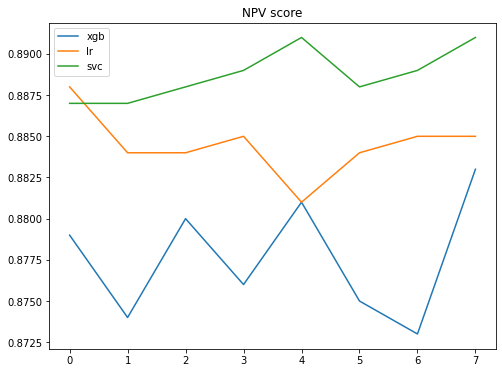

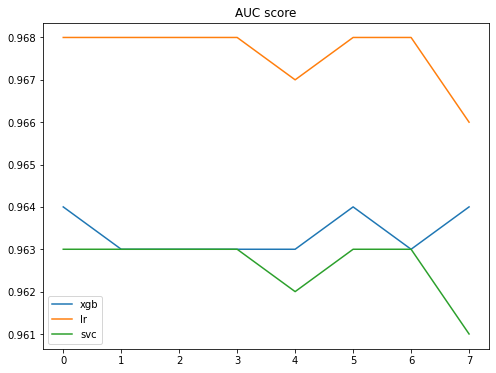

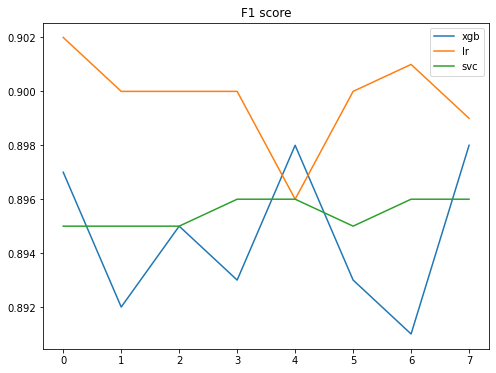

In [42]:
for col in result.columns:
    if col not in ["Prevalence", "Threshold"]:
        res = result[col]
        plt.plot(res[:8].values)
        plt.plot(res[8:16].values)
        plt.plot(res[16:].values)
        plt.legend(["xgb", "lr", "svc"])
        plt.title(col+" score")
        plt.show()